In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [4]:
deliveries #here i am trying to predict total_runs

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [5]:
matches # Here i am trying to predict winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [8]:
deliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,150460.0,318.281317,182.955531,1.0,161.0,319.0,476.0,636.0
inning,150460.0,1.482188,0.501768,1.0,1.0,1.0,2.0,4.0
over,150460.0,10.142649,5.674338,1.0,5.0,10.0,15.0,20.0
ball,150460.0,3.616483,1.807698,1.0,2.0,4.0,5.0,9.0
is_super_over,150460.0,0.000538,0.023196,0.0,0.0,0.0,0.0,1.0
wide_runs,150460.0,0.037498,0.257398,0.0,0.0,0.0,0.0,5.0
bye_runs,150460.0,0.004885,0.114234,0.0,0.0,0.0,0.0,4.0
legbye_runs,150460.0,0.022232,0.200104,0.0,0.0,0.0,0.0,5.0
noball_runs,150460.0,0.004340,0.072652,0.0,0.0,0.0,0.0,5.0
penalty_runs,150460.0,0.000066,0.018229,0.0,0.0,0.0,0.0,5.0


In [9]:
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,636.0,318.500000,183.741666,1.0,159.75,318.5,477.25,636.0
season,636.0,2012.490566,2.773026,2008.0,2010.00,2012.0,2015.00,2017.0
dl_applied,636.0,0.025157,0.156726,0.0,0.00,0.0,0.00,1.0
win_by_runs,636.0,13.682390,23.908877,0.0,0.00,0.0,20.00,146.0
win_by_wickets,636.0,3.372642,3.420338,0.0,0.00,4.0,7.00,10.0
umpire3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Data Cleaning and Feature Engineering
#checking missing values
deliveries.isna().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [11]:
matches.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [12]:
#dividing into categorial and numerical features
num_feats = list(deliveries.select_dtypes(include='number'))
categ_feats = list(deliveries.select_dtypes(exclude='number'))
print("Features for deliveries.csv")
print("Numerical features:",num_feats)
print("Categorical features :", categ_feats)

num1_feats = list(matches.select_dtypes(include='number'))
categ1_feats = list(matches.select_dtypes(exclude='number'))
print("Features for matches.csv")
print("Numerical features:",num_feats)
print("Categorical features :", categ_feats)

Features for deliveries.csv
Numerical features: ['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']
Categorical features : ['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']
Features for matches.csv
Numerical features: ['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']
Categorical features : ['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder']


In [13]:
#let's replace missing values in each numerical feature with the median
for feat in num_feats:
    deliveries[feat].fillna(deliveries[feat].median(), inplace=True)

#let's replace missing values in each categorical feature with the most frequent value
for feat in categ_feats:
    deliveries[feat].fillna(deliveries[feat].value_counts().index[0],inplace=True)

In [14]:
#let's replace missing values in each numerical feature with the median
for feat in num1_feats:
    matches[feat].fillna(matches[feat].median(), inplace=True)

#let's replace missing values in each categorical feature with the most frequent value
for feat in categ1_feats:
    matches[feat].fillna(matches[feat].value_counts().index[0],inplace=True)

c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [15]:
#testing missing values
deliveries.isna().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed    False
dismissal_kind      False
fielder             False
dtype: bool

In [16]:
matches.isna().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
umpire3             True
dtype: bool

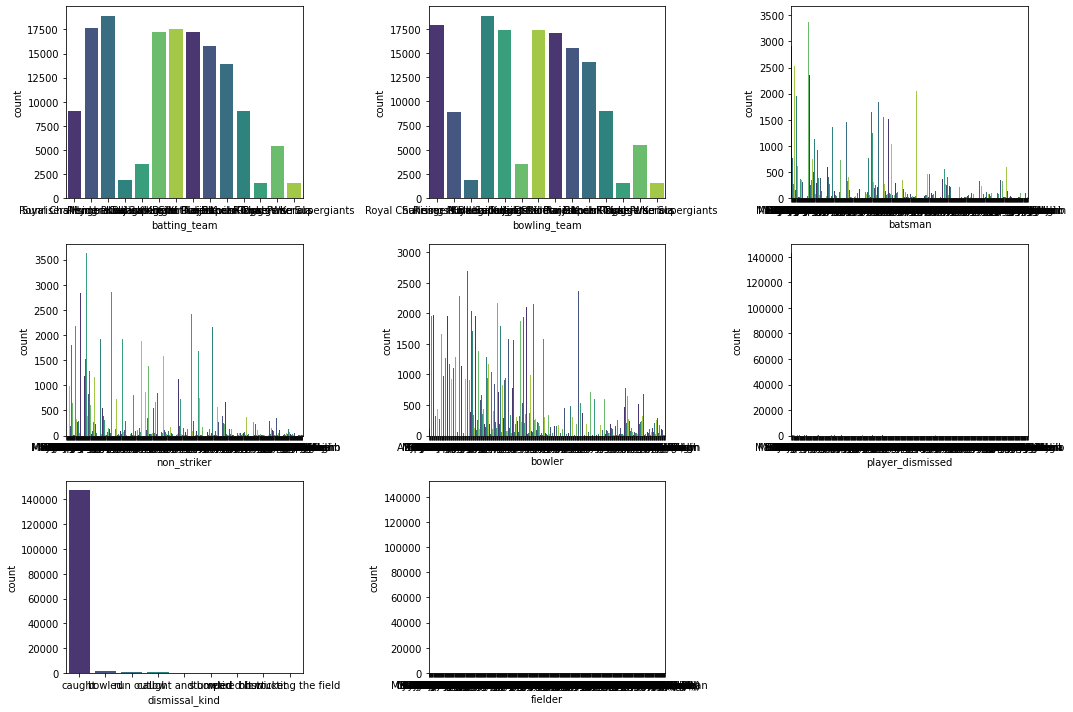

In [17]:
#let's plot distribution of categorical columns
colors =sns.color_palette('viridis', 7)

fig = plt.figure(figsize= (15,10))
for i, col in enumerate(categ_feats):
    ax=fig.add_subplot(3, 3, i+1)
    sns.countplot(x=deliveries[col],palette=colors, ax=ax)

fig.tight_layout()  
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

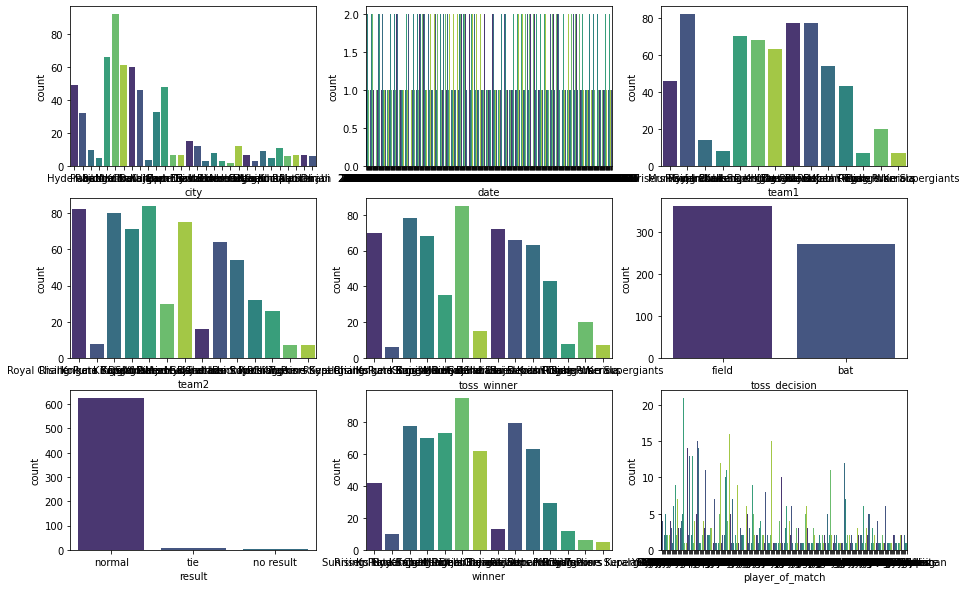

In [18]:
#let's plot distribution of categorical columns
colors =sns.color_palette('viridis', 7)

fig = plt.figure(figsize= (15,10))
for i, col in enumerate(categ1_feats):
    ax=fig.add_subplot(3, 3, i+1)
    sns.countplot(x=matches[col],palette=colors, ax=ax)

fig.tight_layout()  
plt.show()

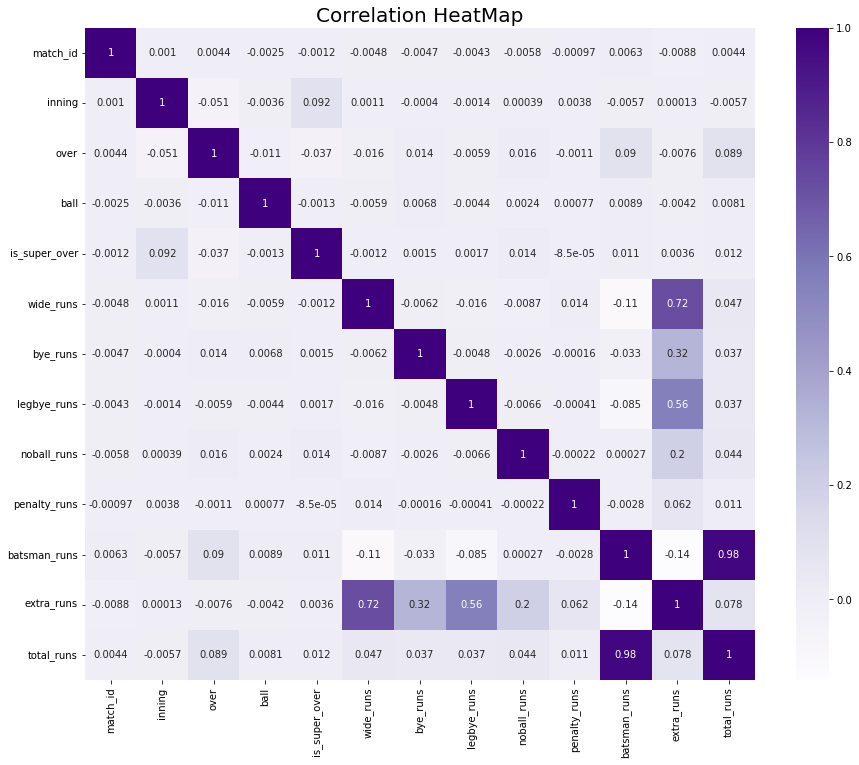

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(deliveries[num_feats].corr(),cmap='Purples',annot=True)
plt.title ('Correlation HeatMap', fontsize=20)
plt.show()

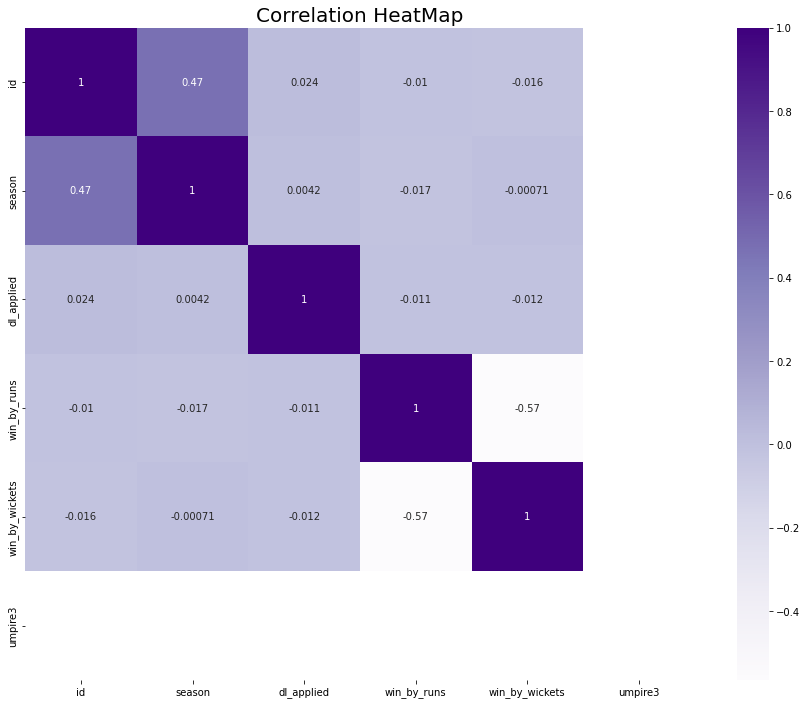

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(matches[num1_feats].corr(),cmap='Purples',annot=True)
plt.title ('Correlation HeatMap', fontsize=20)
plt.show()

In [21]:
#label encoding
LABELS = deliveries.columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if deliveries[col].dtype == 'O':
        deliveries[col] = encoder.fit_transform(deliveries[col]) #fit label encoder and return encoded labels.
  
        
    elif deliveries[col].dtype == 'bool':
        train_data[col] = train_data[col].astype('int')

In [22]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,13,12,1,1,103,347,331,0,...,0,0,0,0,0,0,0,353,1,189
1,1,1,13,12,1,2,103,347,331,0,...,0,0,0,0,0,0,0,353,1,189
2,1,1,13,12,1,3,103,347,331,0,...,0,0,0,0,4,0,4,353,1,189
3,1,1,13,12,1,4,103,347,331,0,...,0,0,0,0,0,0,0,353,1,189
4,1,1,13,12,1,5,103,347,331,0,...,0,0,0,0,0,2,2,353,1,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,12,13,20,2,399,91,50,0,...,0,0,0,0,2,0,2,353,1,189
150456,636,2,12,13,20,3,399,91,50,0,...,0,0,0,0,0,0,0,85,7,271
150457,636,2,12,13,20,4,160,399,50,0,...,0,1,0,0,0,1,1,353,1,189
150458,636,2,12,13,20,5,399,161,50,0,...,0,0,0,0,1,0,1,353,1,189


In [23]:
#label encoding
LABELS = matches.columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if matches[col].dtype == 'O':
        matches[col] = encoder.fit_transform(matches[col]) #fit label encoder and return encoded labels.
  
        
    elif matches[col].dtype == 'bool':
        matches[col] = matches[col].astype('int')

In [24]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,13,407,13,12,12,1,1,0,13,35,0,199,23,5,23,NaN
1,2,2017,24,408,7,10,10,1,1,0,10,0,7,176,16,1,33,NaN
2,3,2017,26,409,3,6,6,1,1,0,6,0,10,30,25,27,11,NaN
3,4,2017,14,410,10,4,4,1,1,0,4,0,6,56,11,2,9,NaN
4,5,2017,2,410,12,2,12,0,1,0,12,15,0,84,14,17,37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,25,402,2,12,12,1,1,0,12,0,6,191,27,1,7,NaN
632,633,2016,2,403,3,12,12,1,1,0,12,0,4,9,14,2,14,NaN
633,634,2016,9,404,13,6,6,1,1,0,13,22,0,103,8,24,9,NaN
634,635,2016,9,405,3,13,13,1,1,0,13,0,4,38,8,24,11,NaN


In [25]:
# removing unnessary columns
deliveries.drop('match_id', axis = 1)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,13,12,1,1,103,347,331,0,0,0,0,0,0,0,0,0,353,1,189
1,1,13,12,1,2,103,347,331,0,0,0,0,0,0,0,0,0,353,1,189
2,1,13,12,1,3,103,347,331,0,0,0,0,0,0,4,0,4,353,1,189
3,1,13,12,1,4,103,347,331,0,0,0,0,0,0,0,0,0,353,1,189
4,1,13,12,1,5,103,347,331,0,2,0,0,0,0,0,2,2,353,1,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,2,12,13,20,2,399,91,50,0,0,0,0,0,0,2,0,2,353,1,189
150456,2,12,13,20,3,399,91,50,0,0,0,0,0,0,0,0,0,85,7,271
150457,2,12,13,20,4,160,399,50,0,0,0,1,0,0,0,1,1,353,1,189
150458,2,12,13,20,5,399,161,50,0,0,0,0,0,0,1,0,1,353,1,189


In [26]:
matches.drop('id', axis = 1)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,13,407,13,12,12,1,1,0,13,35,0,199,23,5,23,NaN
1,2017,24,408,7,10,10,1,1,0,10,0,7,176,16,1,33,NaN
2,2017,26,409,3,6,6,1,1,0,6,0,10,30,25,27,11,NaN
3,2017,14,410,10,4,4,1,1,0,4,0,6,56,11,2,9,NaN
4,2017,2,410,12,2,12,0,1,0,12,15,0,84,14,17,37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2016,25,402,2,12,12,1,1,0,12,0,6,191,27,1,7,NaN
632,2016,2,403,3,12,12,1,1,0,12,0,4,9,14,2,14,NaN
633,2016,9,404,13,6,6,1,1,0,13,22,0,103,8,24,9,NaN
634,2016,9,405,3,13,13,1,1,0,13,0,4,38,8,24,11,NaN


In [27]:
#different models
x1=deliveries[['inning','batting_team','bowling_team','over','ball','batsman','non_striker','bowler','is_super_over','wide_runs','bye_runs','legbye_runs', 'noball_runs','penalty_runs','batsman_runs', 'extra_runs','player_dismissed', 'dismissal_kind','fielder']]
y1= deliveries['total_runs']

In [28]:

x2=matches[['season','city','date','team1','team2','toss_winner','toss_decision','result','dl_applied','win_by_runs','win_by_wickets','player_of_match','venue','umpire1','umpire2','umpire3']]
y2= matches['winner']

No of dimensions: 18


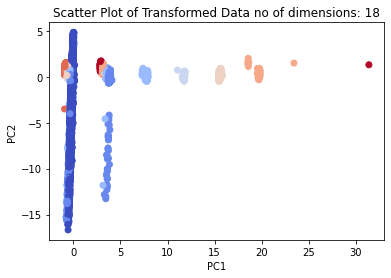

In [29]:
#pca for both
#pca for deliveries

# Separate the last 4th column into df1
df = deliveries.copy()
df1 = df[df.columns[-4]].copy()
df.drop(df.columns[-4], axis=1, inplace=True)


# Standardize the data
scaler = StandardScaler()
df_standard = scaler.fit_transform(df)

# Compute the covariance matrix
df_cov = np.cov(df_standard.T)

# Calculate eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(df_cov)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_idx]
eig_vectors = eig_vectors[:, sorted_idx]

# Set the desired variance explained
variance_explained = 0.95
total_variance = np.sum(eig_values)

# Determine the number of dimensions (k) to retain
k = 0
variance_sum = 0
while (variance_sum / total_variance < variance_explained):
    variance_sum += eig_values[k]
    k += 1

print("No of dimensions: " + str(k))

# Select the top k eigenvectors
top_k_eigenvectors = eig_vectors[:, :k]

# Perform dimensionality reduction using PCA
X_pca = np.dot(df_standard, top_k_eigenvectors)

# Create a scatter plot of the transformed data
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df1.values, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter Plot of Transformed Data' + " no of dimensions: " + str(k))

plt.show()

No of dimensions: 13


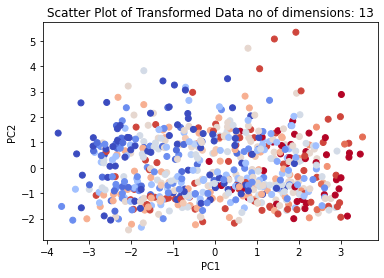

In [30]:
#pca for matches
df = matches.copy()
df1 = df[df.columns[-8]].copy()
df.drop(df.columns[-8], axis=1, inplace=True)
df.drop('umpire3', axis = 1, inplace = True)

# Standardize the data
scaler = StandardScaler()
df_standard = scaler.fit_transform(df)

# Compute the covariance matrix
df_cov = np.cov(df_standard.T)

# Calculate eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(df_cov)

# Sort eigenvalues in descending order
sorted_idx = np.argsort(eig_values)[::-1]
eig_values = eig_values[sorted_idx]
eig_vectors = eig_vectors[:, sorted_idx]

# Set the desired variance explained
variance_explained = 0.95
total_variance = np.sum(eig_values)

# Determine the number of dimensions (k) to retain
k = 0
variance_sum = 0
while (variance_sum / total_variance < variance_explained):
    variance_sum += eig_values[k]
    k += 1

print("No of dimensions: " + str(k))

# Select the top k eigenvectors
top_k_eigenvectors = eig_vectors[:, :k]

# Perform dimensionality reduction using PCA
X_pca = np.dot(df_standard, top_k_eigenvectors)

# Create a scatter plot of the transformed data
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df1.values, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter Plot of Transformed Data' + " no of dimensions: " + str(k))

plt.show()

In [31]:
#trying models
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=1)
X_train.dtypes

inning              int64
batting_team        int32
bowling_team        int32
over                int64
ball                int64
batsman             int32
non_striker         int32
bowler              int32
is_super_over       int64
wide_runs           int64
bye_runs            int64
legbye_runs         int64
noball_runs         int64
penalty_runs        int64
batsman_runs        int64
extra_runs          int64
player_dismissed    int32
dismissal_kind      int32
fielder             int32
dtype: object

In [32]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x2,y2,test_size=0.3,random_state=1)
X1_train.dtypes

season               int64
city                 int32
date                 int32
team1                int32
team2                int32
toss_winner          int32
toss_decision        int32
result               int32
dl_applied           int64
win_by_runs          int64
win_by_wickets       int64
player_of_match      int32
venue                int32
umpire1              int32
umpire2              int32
umpire3            float64
dtype: object

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accKNN = knn.score(X_test, y_test)
knn.fit(X1_train, y1_train)
accKNN1 = knn.score(X1_test, y1_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accLogreg = logreg.score(X_test, y_test)
logreg.fit(X1_train, y1_train)
accLogreg1 = logreg.score(X1_test, y1_test)

In [ ]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
accLinsvm = linear_svm.score(X_test, y_test)
linear_svm.fit(X1_train, y1_train)
accLinsvm1 = linear_svm.score(X1_test, y1_test)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
accTree = tree.score(X_test, y_test)
tree.fit(X1_train, y1_train)
accTree1 = tree.score(X1_test, y1_test)

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
accForest = forest.score(X_test, y_test)
forest.fit(X1_train, y1_train)
accForest1 = forest.score(X1_test, y1_test)

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
accGbrt = gbrt.score(X_test, y_test)
gbrt.fit(X1_train, y1_train)
accGbrt1 = gbrt.score(X1_test, y1_test)

In [ ]:
models = pd.DataFrame({
    'Model': ['KNeighbors', 'LogisticRegression', 'LinearSVC', 
              'DecisionTree', 'RandomForest', 
              'GradientBoosting'],
    'Score': [accKNN, accLogreg, accLinsvm, accTree, accForest, accGbrt]})
models.sort_values(by='Score', ascending=False)
print("for deliveries")

In [ ]:
models = pd.DataFrame({
    'Model': ['KNeighbors', 'LogisticRegression', 'LinearSVC', 
              'DecisionTree', 'RandomForest', 
              'GradientBoosting'],
    'Score': [accKNN1, accLogreg1, accLinsvm1, accTree1, accForest1, accGbrt1]})
models.sort_values(by='Score', ascending=False)
print("for matches")